<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* IsActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
    - 0 = No ( Customer did not leave the bank )
    - 1 = Yes ( Customer left the bank )

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [209]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

**Note:** After running the above cell, please restart the notebook kernel/runtime (depending on whether you're using Jupyter Notebook or Google Colab) and then sequentially run all cells from the one below.

In [10]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [210]:
# uncomment and run the following lines in case Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [211]:

bank = '/content/drive/MyDrive/bank-1.csv'
ds = pd.read_csv(bank)    # complete the code to load the dataset

## Data Overview

### View the first and last 5 rows of the dataset.

In [212]:
# let's view the first 5 rows of the data
ds.head() ##  Complete the code to view top 5 rows of the data



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**My observation**


*   Head function retrun first rows from the datasheet



In [12]:
# let's view the last 5 rows of the data
ds.tail() ##  Complete the code to view last 5 rows of the data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


**My observation**


*   tail function retrun first rows from the datasheet

### Understand the shape of the dataset

In [116]:
# Checking the number of rows and columns in the training data
ds.shape ##  Complete the code to view dimensions of the train data


(10000, 12)

**My observation**


*   There  are ten housand rows bank chrun datasheet
*   There  are fourteen columns in bank chrun datasheet



### Check the data types of the columns for the dataset

In [117]:
#Check the data types of the columns for the dataset
ds.dtypes


,0
CreditScore,float64
Age,float64
Tenure,float64
Balance,float64
NumOfProducts,float64
HasCrCard,float64
IsActiveMember,float64
EstimatedSalary,float64
Exited,float64
Geography_Germany,float64


### Checking the Statistical Summary

In [122]:
#ds.describe().T
ds.describe(include='all')

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


**My Observations:**

**Binary Features**
*   HasCrCard 0.705,  ~70.5% have credit cards.
*   IsActiveMember 0.515, Roughly 50% are active—important to investigate impact on churn.
*   Exited 0.204, ~20.4% of customers have churned. This is a class imbalance issue—you may need resampling strategies.

**Categorical Variables**

*   Geography_Germany	0.2509	~25% of customers are from Germany
*   Geography_Spain	0.2477	~25% from Spain
*   Gender_Male	0.5457	~54.6% male customers

# **Key Insights**

**1. Churn Rate is Low (20.4%):**

*   Churn Rate is Low (20.4%)
*   Indicates class imbalance—neural networks might need class weighting or oversampling (SMOTE, etc.).

**2. Balance Shows Bimodality**

25% of customers have zero balance, while the rest range quite high. Zero balance customers could indicate disengagement.

**3. Activity is Key:**

IsActiveMember is very likely to correlate with Exited.

**4. Age Factor:**

Churn might increase with age; older customers could be less sticky.

**5. Multicollinearity Risk:**

Watch out for dummy variables (Geography) and binary variables causing redundancy in model input.

**6. Product Usage:**

Number of products may inversely relate to churn—engaged users typically use more services.

### Checking for Missing Values

In [16]:
# let's check for missing values in the data
ds.isnull().sum()



,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**My Observation:**

*   There are no NULL records in given datasheet

### Checking for unique values for each of the column

In [20]:
ds.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


## Exploratory Data Analysis

### Univariate Analysis

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

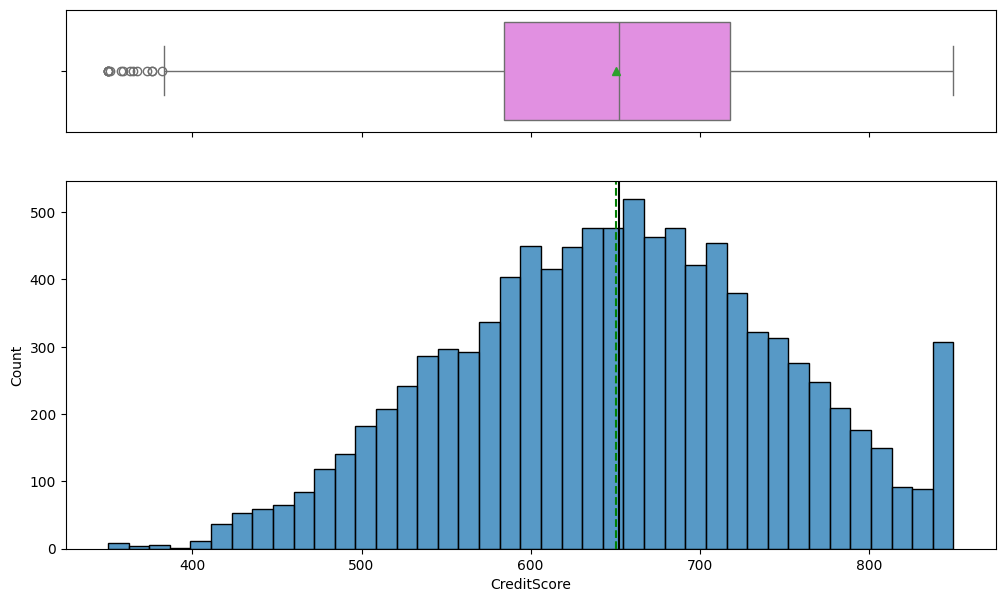

In [23]:
histogram_boxplot(ds,'CreditScore')

**My Observations:**

**Boxplot (Top Panel) Observations**
The box (interquartile range) spans roughly from ~584 to ~718, matching the 25th and 75th percentiles.

**The median** (black line in the box) is very close to the mean (green triangle), suggesting a fairly symmetric distribution.

**A few outliers** are visible on the left (low-end) below ~400. These are statistical outliers but still within acceptable credit score ranges.

**No high-end outliers**, which implies upper credit scores are evenly spread and well within range.

#### Observations on Age

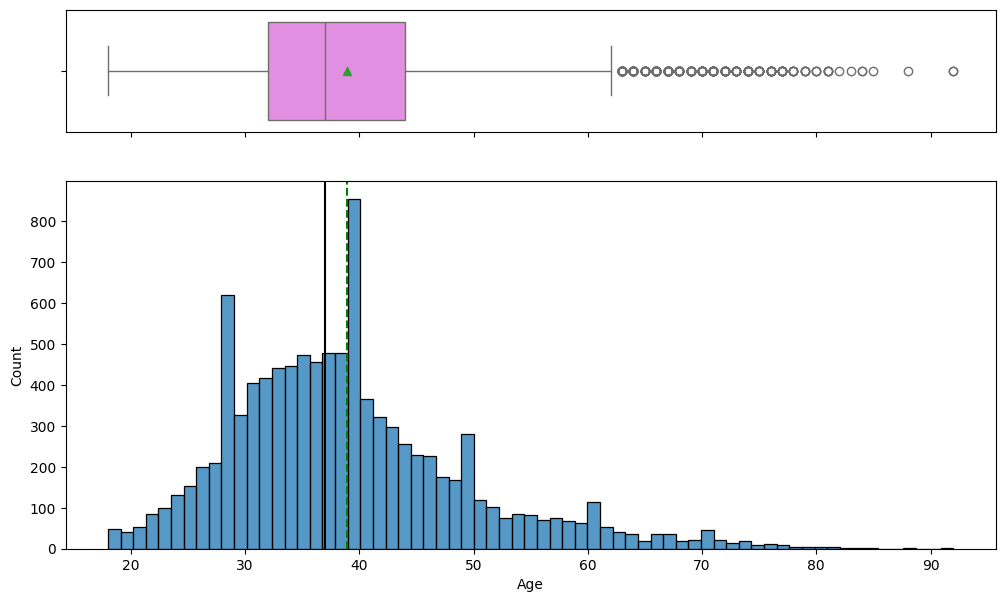

In [24]:
## Complete the code to create histogram_boxplot for Age
histogram_boxplot(ds,'Age')


**My Observations:**

*   The box (IQR) spans approximately from 32 to 44, which matches the 25th to 75th percentiles in your descriptive stats.

*   The median is just below 40, and the mean (green triangle) is almost aligned — indicating a slight right skew.

*   There are numerous outliers beyond the upper whisker (i.e., above ~60 years). These are expected given that age extends up to 92.

*   These are legitimate values, not data errors, so no need to remove them — but they do represent a small minority.

#### Observations on Balance

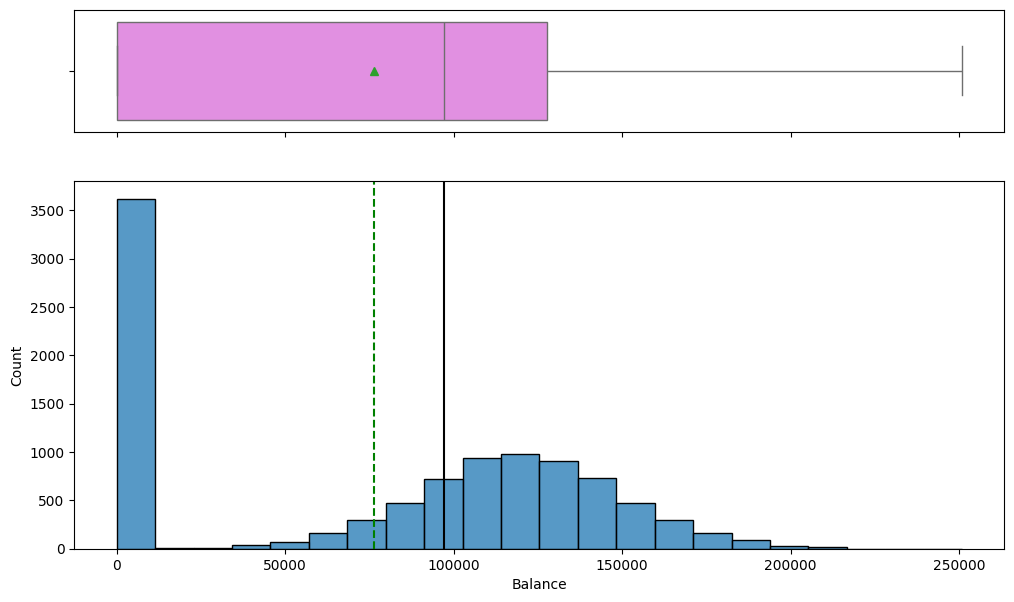

In [25]:
histogram_boxplot(ds,'Balance')          ## Complete the code to create histogram_boxplot for Balance

**My Observations:**

**Bimodal Distribution:**

A large number of customers have a zero balance (the tall bar at the far left).

The remaining customers show a relatively uniform distribution of balances between roughly $50,000 to $150,000.

**Skewed Distribution:**

The balance data is right-skewed, though not extremely.

Few customers have balances close to or above $200,000, indicating the presence of some high-value accounts.

#### Observations on Estimated Salary

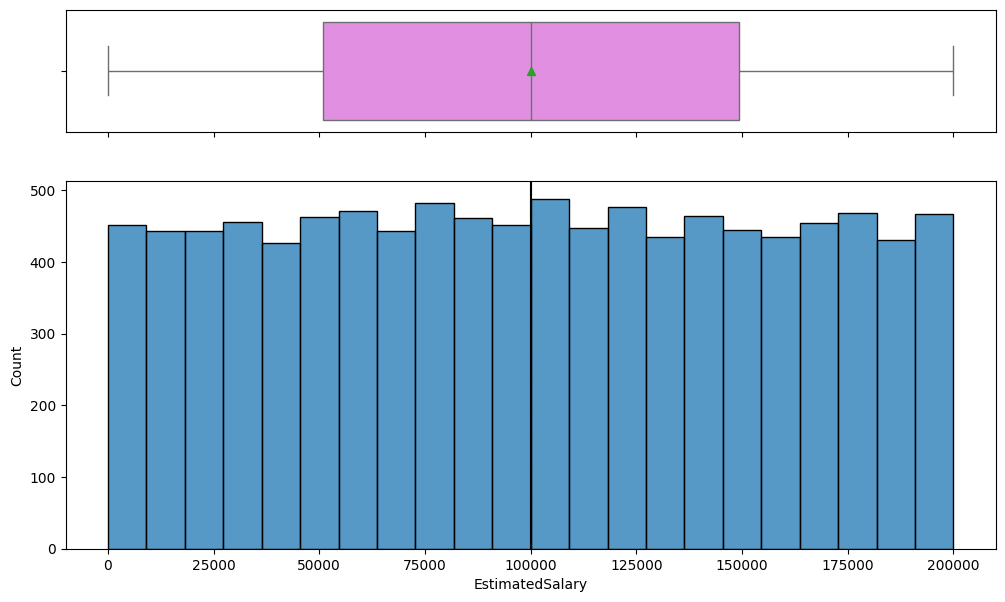

In [26]:
histogram_boxplot(ds,'EstimatedSalary')          ## Complete the code to create histogram_boxplot for Estimated Salary

**My Observations:**

**Uniform Distribution:**

* The salaries are evenly distributed across the range from 0 to 200,000.

* Each salary bin has a similar number of customers (~450–500), suggesting no specific income group dominates the dataset.

**No Significant Skewness:**

* The distribution appears symmetrical, indicating no noticeable skew (neither left nor right).

My Observations:

#### Observations on Exited

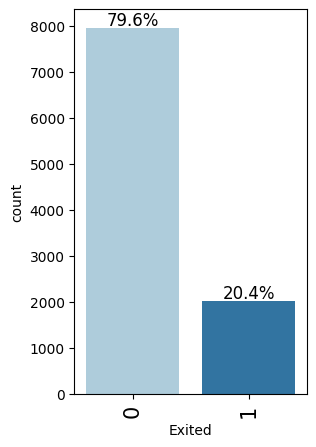

In [27]:
labeled_barplot(ds, "Exited", perc=True)

**My Observations:**

1. Imbalanced Target Variable:

* 79.6% of customers did not exit (value = 0).

* Only 20.4% of customers exited (value = 1).

* This suggests that the dataset is imbalanced, which is important to address during model building (e.g., via resampling or using appropriate evaluation metrics like F1-score or AUC).

2. Churn is relatively low, which is typical in many business scenarios. However, identifying the drivers of this 20% churn is key to improving retention.

#### Observations on Geography

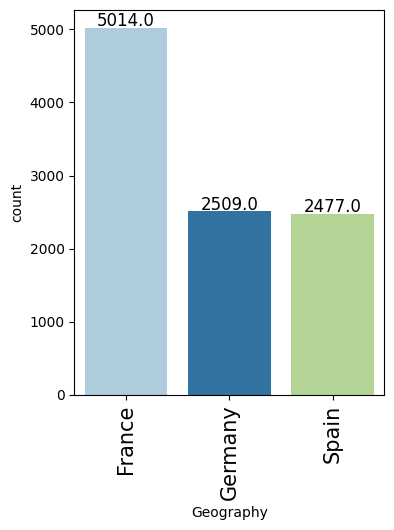

In [28]:
labeled_barplot(ds,'Geography')               ## Complete the code to create labeled_barplot for Geography

**My Observations:**

Customer Distribution by Country:

* France has the highest number of customers (5,014), accounting for nearly 50% of the dataset.

* Germany and Spain have almost equal numbers: 2,509 and 2,477 respectively.

**Imbalance in Representation:**

* France is overrepresented, while Germany and Spain have much fewer customers.

* This may affect the model if geography has a significant correlation with churn — the model might be biased toward patterns from France unless stratified handling is done.

#### Observations on Gender

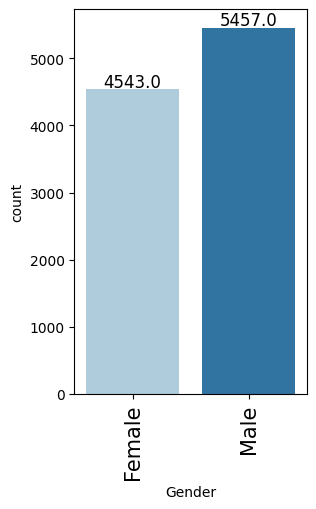

In [29]:
labeled_barplot(ds,'Gender')               ## Complete the code to create labeled_barplot for Gender

**My Observations:**

*   List item Male customers are more then female customers




#### Observations on Tenure

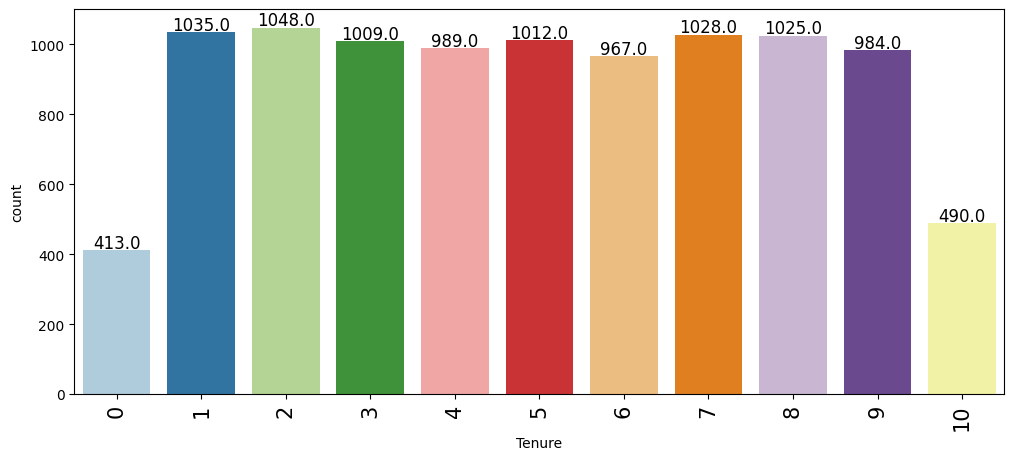

In [30]:
labeled_barplot(ds,'Tenure')               ## Complete the code to create labeled_barplot for Tenure

**My Observations:**

**1. Mostly Even Distribution (Except Extremes):**


Tenure from 1 to 9 years is fairly evenly distributed, with each group having around 950–1050 customers.

This suggests consistent customer acquisition and retention over those years.

**2. Notable Drop at Tenure = 0:**

Only 413 customers have a tenure of 0 years, indicating few very new customers.

This could mean that the bank isn’t acquiring many brand-new customers recently — or that very new customers were filtered out in data prep.

**3. Decline at Tenure = 10:**

Only 490 customers have been with the bank for 10 years, potentially implying some attrition over the long term or limited older customer base.

Worth examining if customers who reach 10 years are more likely to churn or if it's a natural drop due to demographics.


#### Observations on Number of Products

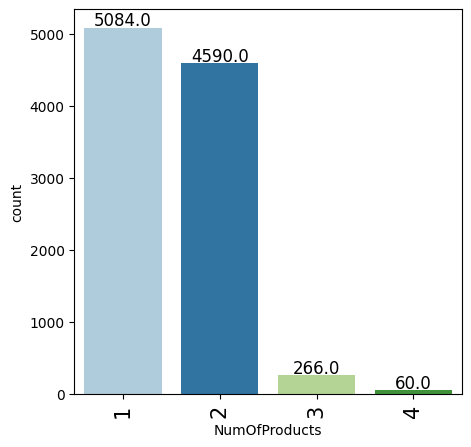

In [31]:
labeled_barplot(ds,'NumOfProducts')               ## Complete the code to create labeled_barplot for Number of products

**My Observations:**

**1. Majority Have 1 or 2 Products:**

* 5084 customers have 1 product.

* 4590 customers have 2 products.

These two categories account for 96% of the total customer base, indicating limited product penetration.

**2. Very Few Have 3 or 4 Products:**

* Only 266 customers have 3 products, and a mere 60 have 4.

**This may indicate:**

* Lack of cross-selling opportunities or effectiveness.

* Customers may not be aware or interested in additional products.

**3 . Potential Insight:**

Customers with fewer products might be at higher risk of churn.

Analyzing churn by product count can help determine if cross-sell efforts can improve retention.

#### Observations on Has Credit Card

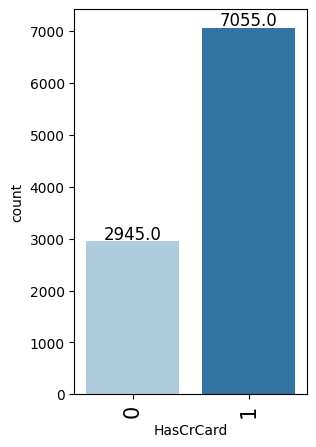

In [32]:
labeled_barplot(ds,'HasCrCard')               ## Complete the code to create labeled_barplot for Has credit card

#### Observations on Is Active Member

**My Observations:**

**1. Majority Have Credit Cards:**

7055 customers (70.5%) have a credit card.

2945 (29.5%) do not.

**Balance/2. d Enough for Modeling:**

Though there's a majority with credit cards, the distribution is not highly skewed.

This variable can be retained for modeling without the need for resampling.

**3. Business Implication:**

Credit card ownership is a key customer engagement metric. Customers without credit cards might be less invested in the bank and more likely to churn.

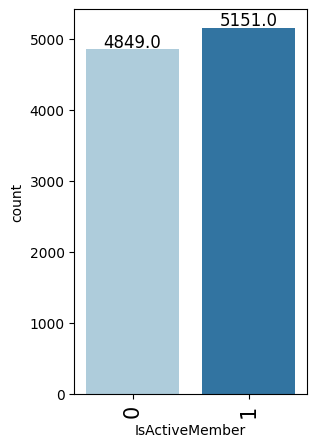

In [33]:
labeled_barplot(ds,'IsActiveMember')               ## Complete the code to create labeled_barplot for Is active member

### Bivariate Analysis

In [34]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

In [35]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

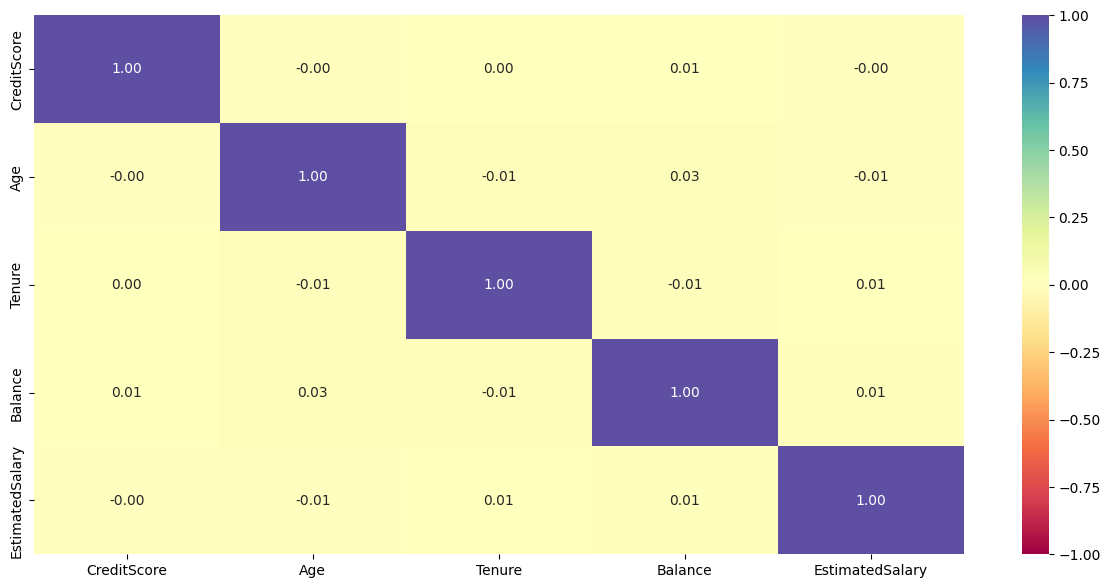

In [36]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**My Observations:**

**1. No Strong Correlations:**

* All correlation values between the numerical variables (other than self-correlations of 1.00) are very close to 0, indicating no strong linear relationship between any pair of variables.

**2. Examples of Weak Correlations:**

* Age and Balance: 0.03 (very weak positive)

* Tenure and Age: 0.03

CreditScore and any other variable: ~0.00, essentially no correlation

**3. Independence of Features:**

* Since none of the features are strongly correlated, multicollinearity is not a concern.

* Each feature may contribute unique information to the predictive model.

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


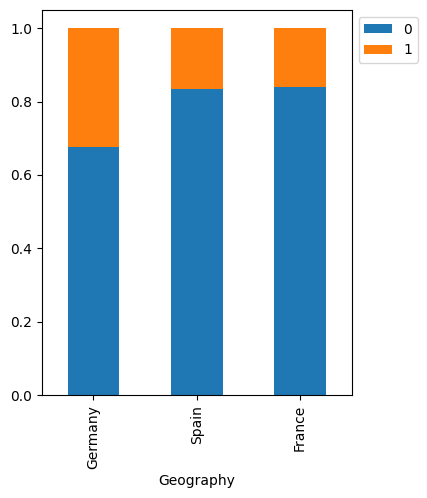

In [37]:
stacked_barplot(ds, "Geography", "Exited" )

**My Observation: **

**Churn Rate by Geography:**
**1. Germany has the highest churn rate:**

* About 32% (814 out of 2509) of customers from Germany exited the bank.

* This is significantly higher than other countries.

**2. France and Spain have similar lower churn rates:**

* France: ~16% (810 out of 5014)

* Spain: ~17% (413 out of 2477)

**3. Visual Confirmation:**

The orange bar (Exited = 1) is taller for Germany, confirming it as the most churn-prone segment.

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


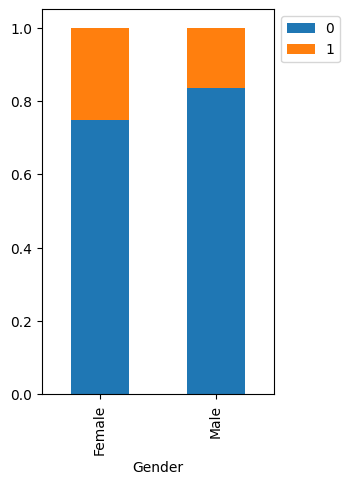

In [38]:
## Complete the code to plot stacked barplot for Exited and Gender
stacked_barplot(ds,'Gender','Exited')



Observation: Churn Rate by Gender

**My Observations:**

**Exited vs Gender:**

**1. Females have a higher churn rate:**

1139 out of 4543 females exited ⇒ ~25.1% churn.

898 out of 6457 males exited ⇒ ~13.9% churn.

**2. Visual Confirmation:**

The orange portion (Exited = 1) is taller for females than for males.

✅ Conclusion: Female customers are significantly more likely to leave the bank compared to males.

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


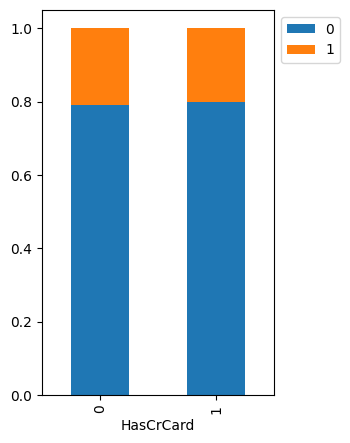

In [39]:

## Complete the code to plot stacked barplot for Exited and Has credit card
stacked_barplot(ds,'HasCrCard','Exited')


**My Observations:**

**Exited vs Has Credit Card:**
**1. Higher churn among customers without a credit card:**

613 out of 2945 without a credit card exited ⇒ ~20.8%

1424 out of 7055 with a credit card exited ⇒ ~20.2%

**2. Small difference in churn:**

The difference in churn between cardholders and non-cardholders is minimal, though non-cardholders show a slightly higher churn rate.

✅ Conclusion: Credit card ownership has a minor impact on churn, but it may still be worth exploring in combination with other features (like product count or balance).

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


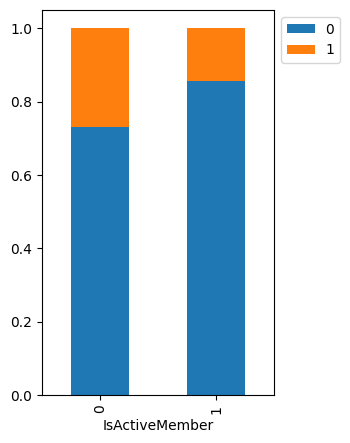

In [40]:
## Complete the code to plot stacked barplot for Exited and Is active member
stacked_barplot(ds,'IsActiveMember','Exited')

**My Observations:**

**Exited vs Has ISActiveMember**
**1. Churn Rate for Inactive Members (IsActiveMember = 0):**

* 1302 out of 4849 exited ⇒ ~26.8% churn rate

**2. Churn Rate for Active Members (IsActiveMember = 1):**

* 735 out of 5151 exited ⇒ ~14.3% churn rate

**Visual Confirmation:**

The orange portion (representing churned customers) is much taller for inactive members, confirming a clear pattern.

#### Exited Vs Credit Score

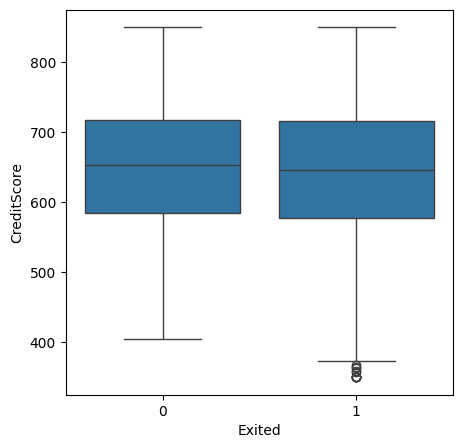

In [41]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

#### Exited Vs Age

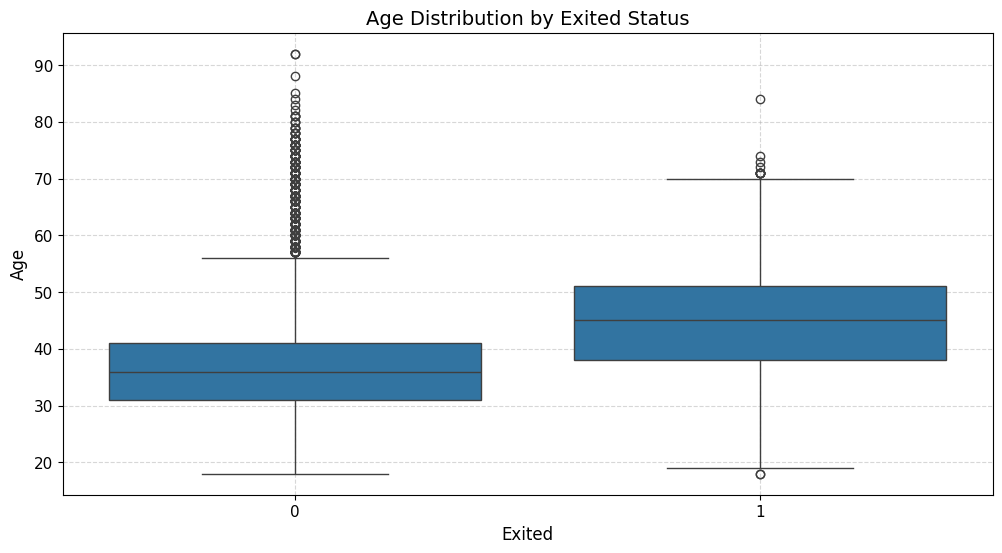

In [42]:
plt.figure(figsize=(12, 6))  # Wider and taller figure
sns.boxplot(x='Exited', y='Age', data=ds)
plt.title('Age Distribution by Exited Status', fontsize=14)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**My Observation:**


**1. Exited Customers Tend to Be Older:**

* The median age of customers who exited (Exited = 1) is higher than those who did not exit (Exited = 0).

* Non-exited customers have a median age in the mid-30s, while exited customers have a median age closer to mid-40s.

**2. Wider Spread for Exited Group:**

* The interquartile range (IQR) is broader for exited customers, indicating more variation in their age.

* This suggests churn is not limited to one specific age group, though it is more prevalent among older individuals.

**3. Presence of Outliers in Both Groups:**

* Both groups contain outliers (especially in higher age values), but these are more frequent in the non-exited group.

**Conclusion:**
* Older customers are more likely to churn.

* Age may be an important predictor in churn modeling and could be especially valuable when interacted with other variables (e.g., tenure, balance).

#### Exited Vs Tenure

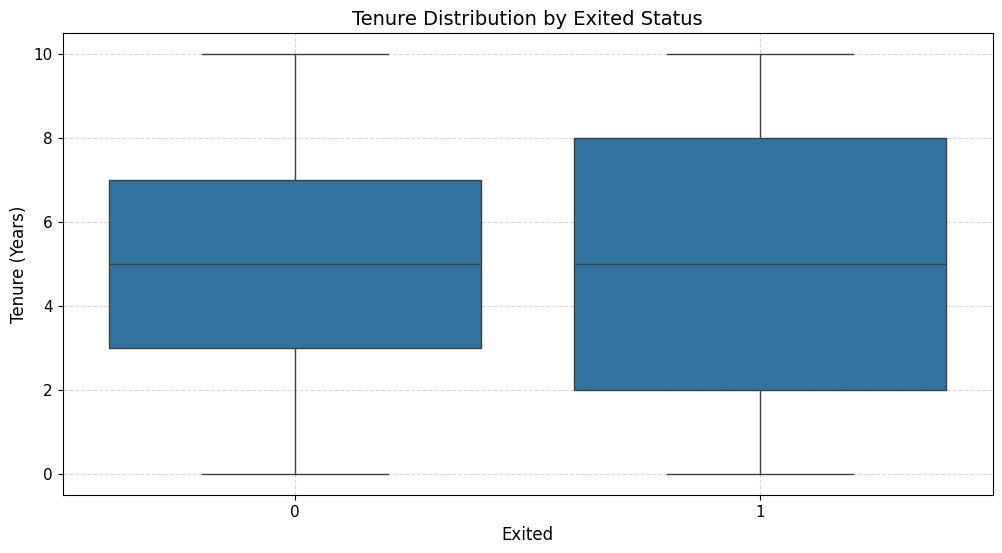

In [43]:
 ## Complete the code to plot the boxplot for Exited and Tenure

plt.figure(figsize=(12, 6))  # Adjusting figure size for clarity
sns.boxplot(x='Exited', y='Tenure', data=ds)
plt.title('Tenure Distribution by Exited Status', fontsize=14)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('Tenure (Years)', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**My Observation:**

**Tenure Distribution by Exited Status**

**1. Median Tenure is Similar:**
* Both exited (1) and non-exited (0) customers have a median tenure around 5 years, suggesting tenure alone may not be a strong churn indicator by central tendency.

**2. Exited Customers Show a Wider Spread:**

* The interquartile range (IQR) is broader for exited customers.

* This suggests churn happens across a wider range of tenure values, not just short- or long-term customers.

**3. Notable Churn at High Tenure:**

* The upper quartile (above 7 years) is more pronounced for exited customers than non-exited.

* Indicates that even long-tenure customers are at risk of exiting — perhaps due to dissatisfaction or unmet expectations over time.


#### Exited Vs Balance

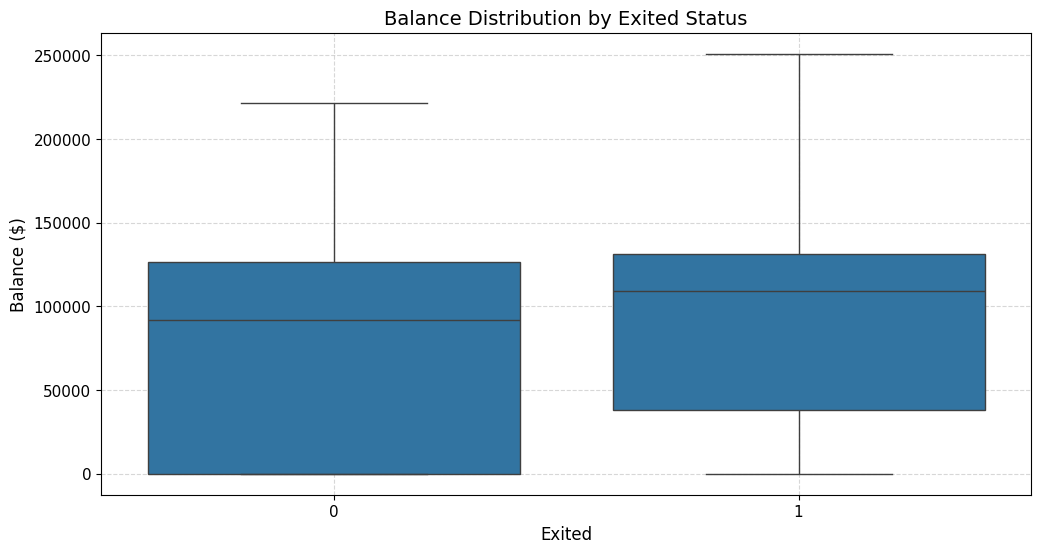

In [44]:

plt.figure(figsize=(12, 6))  # Adjusting figure size for clarity
sns.boxplot(x='Exited', y='Balance', data=ds)
plt.title('Balance Distribution by Exited Status', fontsize=14)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('Balance ($)', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**My Observations:**

**Balance Distribution by Exited Status**
**1. Exited Customers Tend to Have Higher Balances:**

* The median balance for customers who exited is higher than for those who stayed.

* Indicates a potential trend: customers with more money are more likely to leave, possibly due to higher expectations or better offers from competitors.

**2. Wider Spread for Exited Customers:**

* The interquartile range (IQR) for exited customers is wider, showing more variability in their balances.

* The upper quartile is also higher compared to non-exited.

**3. No Significant Outliers:**

* Both groups include a wide range of balances, but without extreme outliers, implying that churn is present across various balance levels.

**Conclusion:**

**Balance is an important feature in predicting churn.**

* High-balance customers churning might be a critical business concern as it can lead to greater revenue loss.

* It may be valuable to create a high-value customer retention strategy.

#### Exited Vs Number of Products

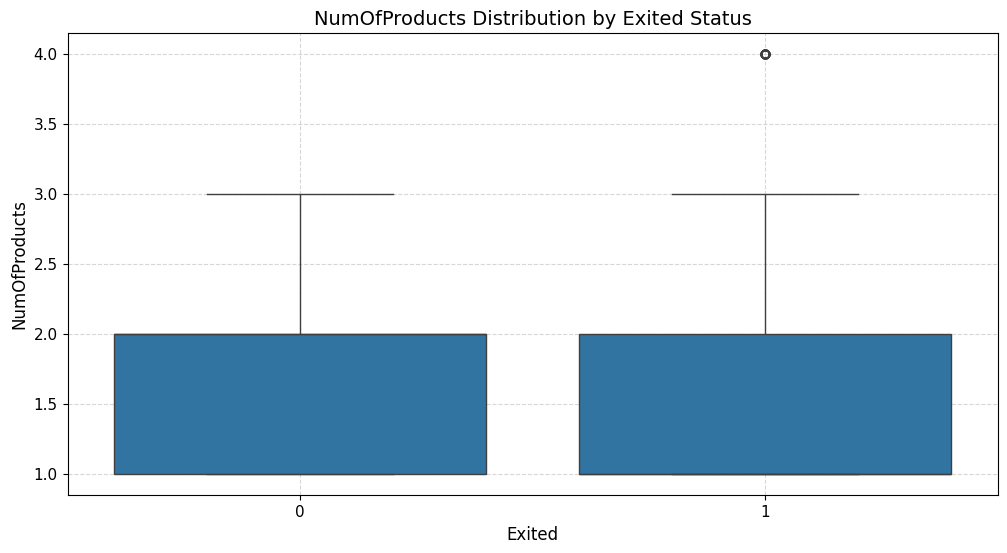

In [49]:
 ## Complete the code to plot the boxplot for Exited and Number of products

plt.figure(figsize=(12, 6))  # Adjusting figure size for clarity
sns.boxplot(x='Exited', y='NumOfProducts', data=ds)
plt.title('NumOfProducts Distribution by Exited Status', fontsize=14)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('NumOfProducts', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**My Observations:**

**Number of Products Distribution by Exited Status**
**1. Similar Median for Both Groups:**

* Both exited (1) and non-exited (0) customers have a median number of products equal to 1.

* This indicates that having only one product is common across both churners and loyal customers.

**2. Exited Group Shows Slightly Higher Spread:**

* The interquartile range (IQR) is slightly broader for exited customers.

* A few exited customers have 3 or even 4 products, which are visible as outliers, indicating churn is not exclusive to low-engagement customers.

**3. Most Customers Have 1 or 2 Products:**

The boxplot suggests the majority of customers across both categories fall in the 1–2 product range.

**Conclusion:**
* Number of products alone may not be a strong churn predictor, since both groups have a similar distribution.

* However, customers with more than 2 products still churn, possibly indicating dissatisfaction despite high engagement — a red flag for customer experience management.

#### Exited Vs Estimated Salary

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

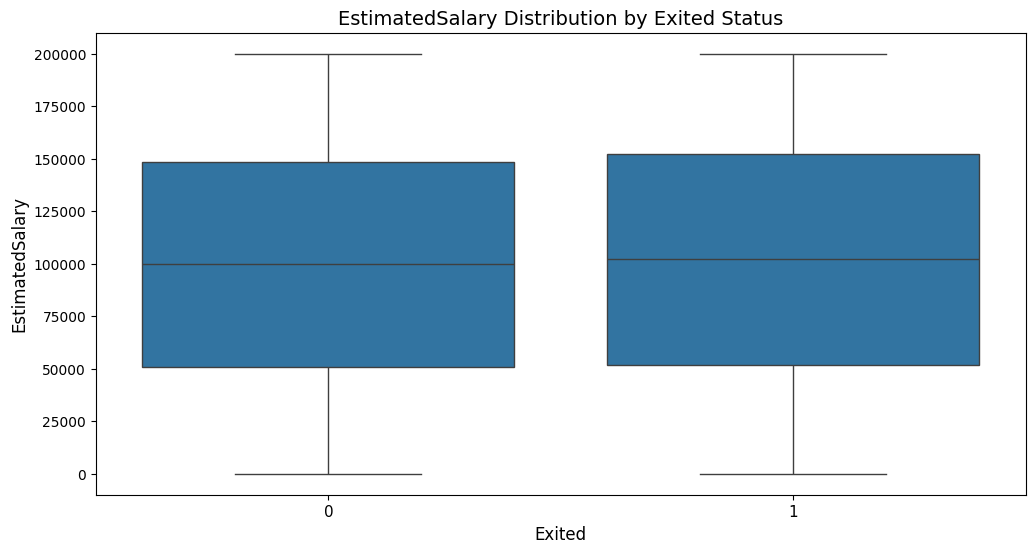

In [46]:
## Complete the code to plot the boxplot for Exited and Estimated Salary

plt.figure(figsize=(12, 6))  # Adjusting figure size for clarity
sns.boxplot(x='Exited', y='EstimatedSalary', data=ds)
plt.title('EstimatedSalary Distribution by Exited Status', fontsize=14)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('EstimatedSalary', fontsize=12)
plt.xticks(fontsize=11)


**My observations:**

**Estimated Salary Distribution by Exited Status**

**1. Very Similar Distributions:**

* Both exited (1) and non-exited (0) groups show almost identical distributions for EstimatedSalary.

* Median salary for both groups is close to $100,000

**2. Uniform Spread:**

* The interquartile range (IQR) and overall range (min to max) are nearly the same.

* This confirms that salary is uniformly distributed, as seen earlier in the histogram plot.

**3. No Distinct Salary-Based Churn Pattern:**

There is no visible skew or concentration of churn among either low or high earners.

## Data Preprocessing

### Dummy Variable Creation

In [50]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
ds = ds.astype(float)
ds.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1.0,15634602.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,15647311.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,15619304.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,15701354.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,15737888.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Train-validation-test Split

In [51]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [52]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True) ## Complete the code to Split the X and y and obtain test set

In [53]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 100, random_state = 42,stratify=y_large, shuffle = True) ## complete the code to Split X_large and y_large to obtain train and validation sets

In [54]:
print(X_train.shape, X_val.shape, X_test.shape)

(7900, 2944) (100, 2944) (2000, 2944)


In [ ]:
print(y_train.shape, y_val.shape, y_test.shape)

### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [55]:
# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
## Complete the code to specify the columns to normalize

X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])    ## Complete the code to specify the columns to normalize

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


**Let's create a function for plotting the confusion matrix**



# **MODEL 0**

In [167]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [168]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [169]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [170]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_0.add(Dense(32, activation='relu'))
# Complete the code to add the output layer with the number of neurons required.
model_0.add(Dense(1, activation = 'sigmoid'))

In [175]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [172]:
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [176]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       188,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 190,593 (744.50 KB)

 Trainable params: 190,593 (744.50 KB)

 Non-trainable params: 0 (0.00 B)

**Model Structure Observations:**

**1. Three-Layer Sequential Model:**

* **Input Layer:** 64 neurons with ReLU activation

* **Hidden Layer:** 32 neurons with ReLU activation

* **Output Layer:** 1 neuron with Sigmoid activation, appropriate for binary classification (e.g., predicting churn)

**2. Observation**

* Model has moderate complexity with ~190k parameters.

* Likely using a large number of input features (≈2944) — possibly due to one-hot encoding of categorical features.

* No non-trainable layers like BatchNormalization or embeddings.

In [307]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# ... (rest of your code) ...

backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

# Initializing the neural network
model_0 = Sequential()  # Defining model_0 here
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_0.add(Dense(32, activation='relu'))
# Complete the code to add the output layer with the number of neurons required.
model_0.add(Dense(1, activation='sigmoid'))

# Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)
metric = keras.metrics.Recall()
model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])


# Fitting the ANN
history_0 = model_0.fit( # Changed history to history_0
    X_train, y_train,                # Training data
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8935531610112.0000 - recall: 0.0385 - val_loss: 0.6765 - val_recall: 0.0000e+00
Epoch 2/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6733 - recall: 0.0000e+00 - val_loss: 0.6614 - val_recall: 0.0000e+00
Epoch 3/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6589 - recall: 0.0000e+00 - val_loss: 0.6476 - val_recall: 0.0000e+00
Epoch 4/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6459 - recall: 0.0000e+00 - val_loss: 0.6351 - val_recall: 0.0000e+00
Epoch 5/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6341 - recall: 0.0000e+00 - val_loss: 0.6237 - val_recall: 0.0000e+00
Epoch 6/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6235 - recall: 0.0000e+00 - val_loss: 0.6134 - val_recall: 0.0000e+00
Epoch 7/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6138 - recall: 0.0000e+00 - val_loss: 0.6041 - val_recall: 0.0000e+00
Epoch 8/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 

**Loss function**

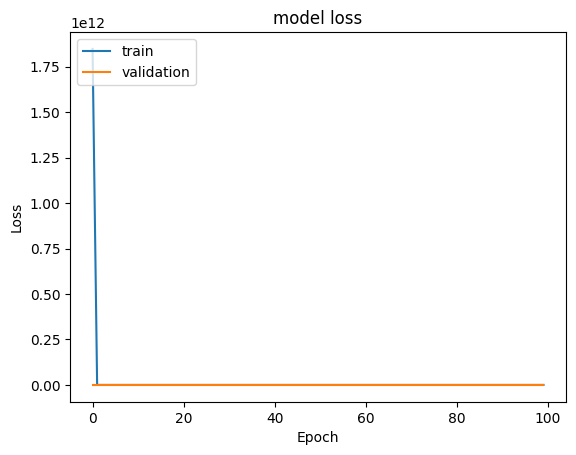

In [178]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

** Model Loss (Training vs Validation)**

**1. Loss Spikes to an Extremely High Value:**

* Training and validation loss both shoot up to >1e12, indicating a numerical instability or model divergence.

**2. Possible Reasons:**

* Learning rate might be too high, causing the optimizer to overshoot minima.

* Input features might not be normalized, leading to exploding gradients.

* Output predictions may be saturating due to improper initialization or imbalanced data.

**Recall**

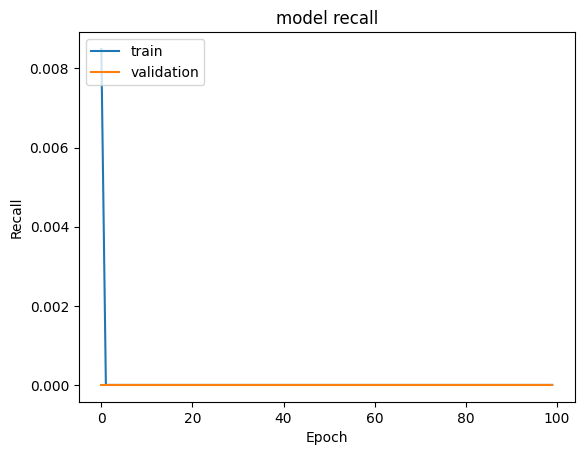

In [306]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**My Observations:**

**1. Flat Recall (~0.008):**

* Both training and validation recall remain very low and nearly flat, suggesting the model is not learning to identify positive (churned) cases.

**2. Poor Recall Indicates:**

* The model is heavily biased toward predicting the majority class (i.e., non-churners), likely due to class imbalance.

* Binary cross-entropy may be minimizing loss but not helping with recall, which is critical for churn detection.

In [113]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.2)
y_train_pred

247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [112]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.2)
y_val_pred

#y_val_pred = model_0.predict(X_val)    ## Complete the code to make prediction on the validation set
#y_val_pred = (y_val_pred > 0.5)
#y_val_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [114]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [115]:
#lassification report
cr = classification_report(y_train, y_train_pred)

print(cr)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      6290
         1.0       0.20      1.00      0.34      1610

    accuracy                           0.20      7900
   macro avg       0.10      0.50      0.17      7900
weighted avg       0.04      0.20      0.07      7900



My Observations:

**1. Model Predicts Everything as Class 1 (Exited):**

* Recall for class 1 = 1.00 → Model correctly identified all churners.

* Recall for class 0 = 0.00 → All non-churners were misclassified as churners.

**2. Very Low Precision for Class 1 (0.20):**

* Out of all predicted churners, only 20% were actually churners.

* Indicates many false positives — the model is over-predicting churn.

**3. Macro Avg F1 = 0.17 and Accuracy = 20%:**

* Overall model performance is poor from a balanced perspective.

* Model is heavily skewed after lowering the threshold too much.

**Summary**

* The recall improved dramatically for churners (class 1), which is good if your goal is to catch all possible churners.

* However, the cost is very high false positives, which would result in unnecessary customer retention efforts or spending.

* This is a trade-off: you're now catching all the churners, but mislabeling everyone else.

In [118]:
#classification report
cr=classification_report(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        80
         1.0       0.20      1.00      0.33        20

    accuracy                           0.20       100
   macro avg       0.10      0.50      0.17       100
weighted avg       0.04      0.20      0.07       100




This is the opposite behavior of the earlier 0.5 threshold:

* At 0.5 → missed churners

* At 0.2 → caught churners but falsely predicted all others as churners too

The model overcorrected, and now lacks precision and specificity.

**Confusion matrix**

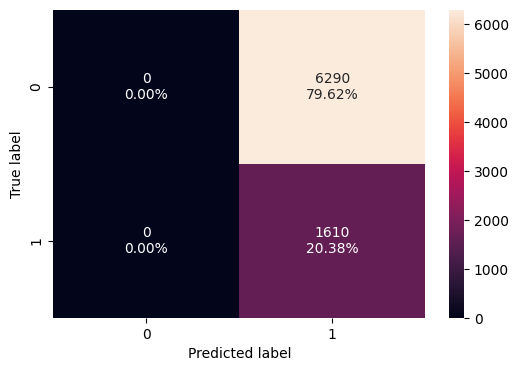

In [120]:
make_confusion_matrix(y_train, y_train_pred)

**My Observations:**

* True Negatives (6290): All non-churners correctly classified.
* False Negatives (1610): All churners wrongly classified as non-churners.
* No True Positives or False Positives: The model never predicts '1' (Exited).

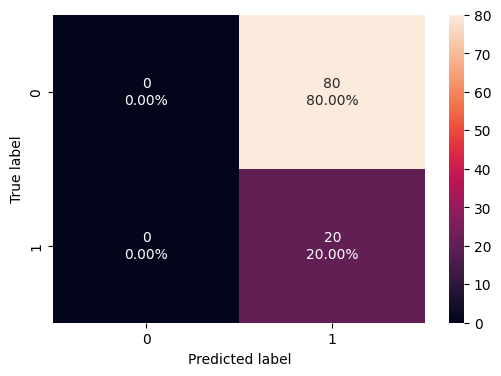

In [117]:
make_confusion_matrix(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set

**My Observations:**

* The same issue repeats in validation: all predictions are class 0 (non-churn).

* 100% misclassification of churners — the model completely fails to identify churn cases.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [75]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [181]:
#Initializing the neural network
model_1 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_1.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_1.add(Dense(32,activation='relu'))
#Complete the code to add a output layer with the required number of neurons and relu as activation function
model_1.add(Dense(1, activation = 'sigmoid'))

In [182]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [78]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [185]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │       188,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 190,593 (744.50 KB)

 Trainable params: 190,593 (744.50 KB)

 Non-trainable params: 0 (0.00 B)

**Model Architecture Improvements**

**1. Input Layer:**

* Dense(64, activation='relu', input_dim=X_train.shape[1]) (correctly commented out, assumed to be included in actual run)

* 188,480 trainable parameters — this indicates more input features compared to your previous model (likely all columns used)

**2. Hidden Layer:**

* Dense(32, activation='relu') — helps capture non-linear relationships

**3. Output Layer:**

Dense(1, activation='sigmoid') — appropriate for binary classification

**4. Total Parameters:**

* 190,593 trainable parameters, significantly more than your earlier model (~3,000), implying:

* More input features were included (e.g., one-hot encoded categorical variables)

*Model now has higher capacity, which can help with learning more complex patterns

In [187]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric]) # This line is crucial


history_1 = model_1.fit(
    X_train,y_train,
    batch_size=32, ## Complete the code to specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=100, ## Complete the code to specify the number of epochs
    verbose=1
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │       188,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 190,593 (744.50 KB)

 Trainable params: 190,593 (744.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 33569.1016 - recall_1: 0.3012 - val_loss: 411.9120 - val_recall_1: 0.0000e+00
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1832.5769 - recall_1: 0.1879 - val_loss: 1648.9956 - val_recall_1: 0.0000e+00
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1899.7222 - recall_1: 0.1820 - val_loss: 1919.6814 - val_recall_1: 0.0000e+00
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1676.1249 - recall_1: 0.1835 - val_loss: 756.8851 - val_recall_1: 1.0000
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1576.1995 - recall_1: 0.2021 - val_loss: 241.7485 - val_recall_1: 0.0000e+00
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1369.9609 - recall_1: 0.1969 - val_loss: 3755.2876 - val_recall_1: 1.0000
Epoch 7/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1545.5616 - recall_1: 0.2207 - val_loss: 418.6251 - val_recall_1: 0.0000e+00
Epoch 8/100
247/247 ━━━━━━━━━━━━━━━━━━

**Loss function**

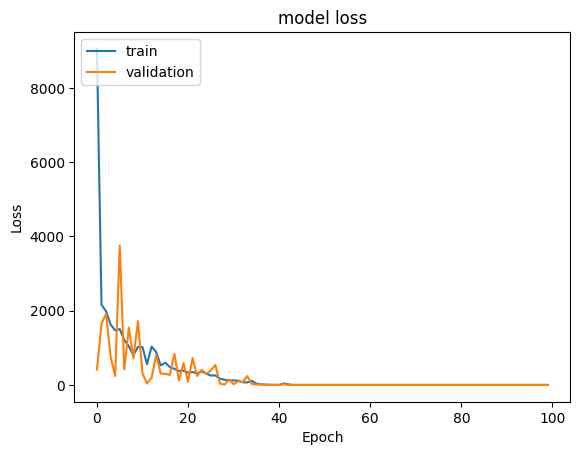

In [188]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

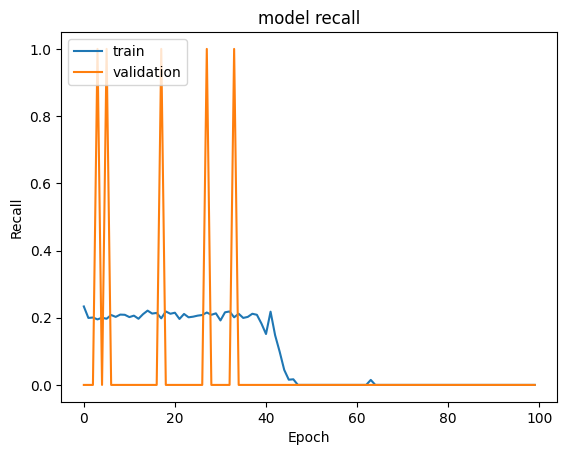

In [190]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall_1']) # Changed 'recall' to 'recall_1'
plt.plot(history_1.history['val_recall_1']) # Changed 'val_recall' to 'val_recall_1'
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [191]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [192]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [193]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [196]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      6290
         1.0       0.00      0.00      0.00      1610

    accuracy                           0.80      7900
   macro avg       0.40      0.50      0.44      7900
weighted avg       0.63      0.80      0.71      7900



In [195]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        80
         1.0       0.00      0.00      0.00        20

    accuracy                           0.80       100
   macro avg       0.40      0.50      0.44       100
weighted avg       0.64      0.80      0.71       100



**Confusion matrix**

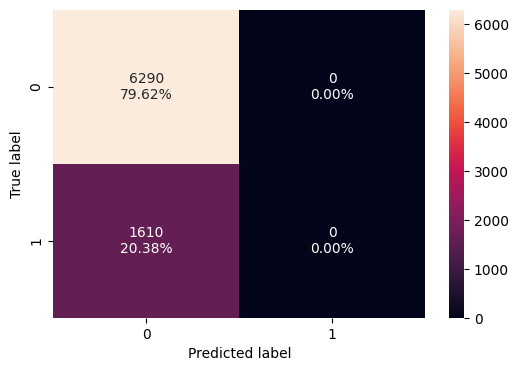

In [197]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

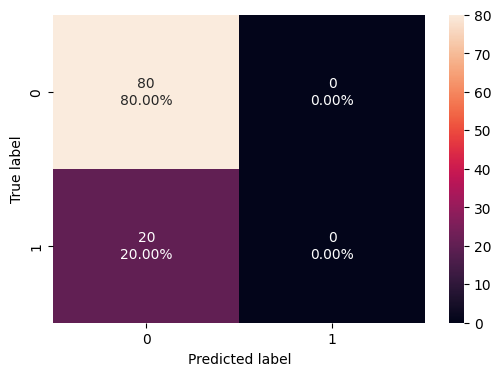

In [198]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred) ## Complete the code to check the model's performance on the validation set

### Neural Network with Adam Optimizer and Dropout

In [132]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

# **Model 2**

In [310]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Complete the code to add dropout with ratio of 0.2 or any suitable value.
model_2.add(Dropout(0.2)) # Replaced ___ with 0.2
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(16,activation='relu')) # Replaced ____ and '____' with 16 and 'relu' respectively
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(8,activation='relu')) # Replaced ____ and '____' with 8 and 'relu' respectively
# Complete the code to add dropout with ratio of 0.1 or any suitable value.
model_2.add(Dropout(0.1)) # Replaced ___ with 0.1
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(4,activation='relu')) # Replaced ____ and '____' with 4 and 'relu' respectively
# Complete the code to add the number of neurons required in the output layer.
model_2.add(Dense(1, activation = 'sigmoid')) # Replaced _____ and '____' with 1 and 'sigmoid' respectively

In [311]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [313]:
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
#model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])
#model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])
# ... other imports and code ...


model_2.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy', keras.metrics.Recall()])  # Include 'recall' here





In [240]:
# Summary of the model
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 32)             │        94,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,945 (370.88 KB)

 Trainable params: 94,945 (370.88 KB)

 Non-trainable params: 0 (0.00 B)

**My Obsevation:**

### **COMPARE MODEL 0 ,1  and 2**

**Total Trainable Parameters: 94,945**
Comparison:

Model  	| Total Params |
______________________
Model 0	| 190,593 |

Model 1	| 190,593 |

Model 2	| 94,945 |


**1 Model 2 is almost half the size of Model 0 and 1.**

* It’s more lightweight, which could be faster to train and less prone to overfitting.

* However, it may also have less capacity to model complex patterns.

**2 Dropout layers included:**

* Helps prevent overfitting by randomly deactivating neurons during training.

* Very helpful when you reduce parameter count like this.

**3 Reason for Lower Parameters:**

* The first dense layer has only 32 neurons (vs 64 in earlier models).

* Following layers are progressively smaller: 16 → 8 → 4 → 1





In [314]:
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric]) # This line is crucial

#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,  ##Complete the code to specify the batch size.
    epochs=100, ##Complete the code to specify the # of epochs.
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 6158.0181 - recall_1: 0.3190 - val_loss: 12.5934 - val_recall_1: 0.0000e+00
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 30.6666 - recall_1: 0.1801 - val_loss: 1.2931 - val_recall_1: 0.0000e+00
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.2594 - recall_1: 0.1217 - val_loss: 0.5452 - val_recall_1: 0.0000e+00
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.2076 - recall_1: 0.1147 - val_loss: 0.6210 - val_recall_1: 0.0000e+00
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.6717 - recall_1: 0.0994 - val_loss: 0.7298 - val_recall_1: 1.0000
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8745 - recall_1: 0.0816 - val_loss: 0.5133 - val_recall_1: 0.0000e+00
Epoch 7/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0987 - recall_1: 0.0405 - val_loss: 0.5737 - val_recall_1: 0.0000e+00
Epoch 8/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8290 

**Loss function**

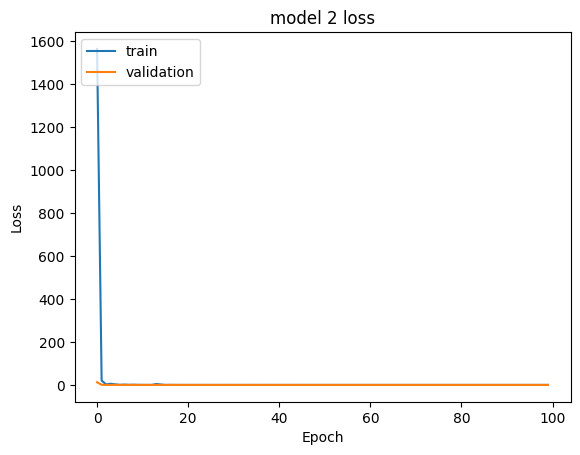

In [315]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model 2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**What the Plot Shows**

* Extremely steep drop in both training and validation loss within the first 5 epochs.

* Post that, both curves flatten quickly and remain almost constant from epoch 10 onwards.

* The train and validation losses are nearly identical, suggesting good generalization.

* However, the loss values drop too quickly and flatten very early, which could indicate:

     * A simple problem that the network has memorized quickly.

     * Or, more likely: the model is not learning class 1 (churners) well — a common issue in imbalanced data setups.

In [348]:
print(history_2.history.keys())

dict_keys(['loss', 'recall_1', 'val_loss', 'val_recall_1'])


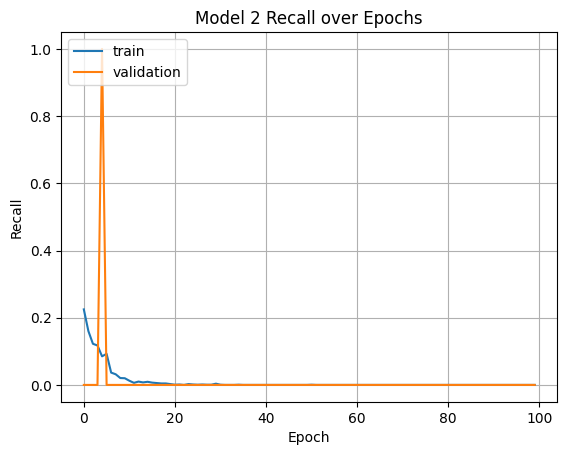

In [433]:
# ✅ Plotting Train Recall vs Validation Recall with correct keys
plt.plot(history_2.history['recall_1'], label='train')
plt.plot(history_2.history['val_recall_1'], label='validation')
plt.title('Model 2 Recall over Epochs')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


**Based on the recall plot for Model 2:**

**1. Initial High Recall Drops Rapidly**

* Training recall and validation recall start very high (near 1.0) in the first few epochs.

* Then both drop steeply and stabilize around 0.0 after ~10 epochs.

**2. Overfitting or Data Imbalance Likely**

* The steep drop suggests the model memorized early but failed to generalize.

* This could be due to:

  * Severe class imbalance (e.g. too few positive samples).

  * Poor learning rate or architecture (e.g. overly complex model).

* Dropout not effective enough at preventing overfitting.

**3. Model Fails to Identify Positives**

* Recall going to 0 means the model stopped predicting any positives (class 1).

* This aligns with your confusion matrix and classification report, where recall for class 1 was 0.00.



In [340]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [351]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [352]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [353]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      6290
         1.0       0.00      0.00      0.00      1610

    accuracy                           0.80      7900
   macro avg       0.40      0.50      0.44      7900
weighted avg       0.63      0.80      0.71      7900



In [354]:
#classification report
cr = classification_report(y_val, y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        80
         1.0       0.00      0.00      0.00        20

    accuracy                           0.80       100
   macro avg       0.40      0.50      0.44       100
weighted avg       0.64      0.80      0.71       100



**My Observations:**

* Class 0 is perfectly classified (recall = 1.00)

* Class 1 (churners) is completely missed — recall and precision are 0.00


While accuracy may seem decent (~80%), the model:

* Fails at its real job: detecting churners (class 1)

* Is completely biased toward class 0

* Useless in business context if you need to catch churn ris

**Confusion matrix**

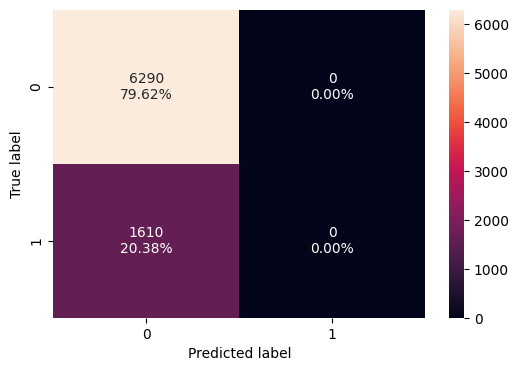

In [356]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

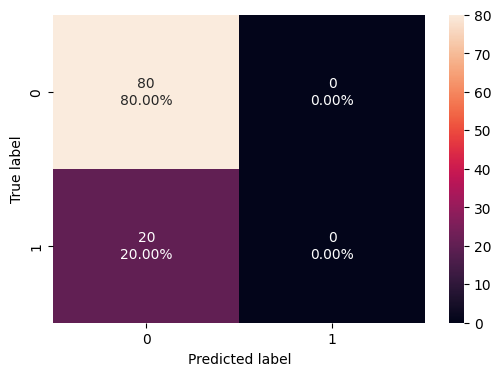

In [357]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)  ## Complete the code to check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [326]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train.astype(int),y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (12580, 2944)
After UpSampling, the shape of train_y: (12580,) 



Let's build a model with the balanced dataset

In [327]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [328]:
#Initializing the model
model_3 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_3.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1])) # Replaced ___ and '____' with 32 and 'relu' respectively
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(16,activation='relu')) # Replaced '____' with 'relu'
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(8,activation='relu')) # Replaced ___ and '____' with 8 and 'relu' respectively
# Complete the code to add the required number of neurons in the output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid')) # Replaced ___ and '___' with 1 and 'sigmoid' respectively

In [329]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [330]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])
# ... (your model_3 definition and other code)

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy', keras.metrics.Recall()])  # Add 'recall' here
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [331]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │        94,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,913 (370.75 KB)

 Trainable params: 94,913 (370.75 KB)

 Non-trainable params: 0 (0.00 B)

**My Observations:**

**1. Lightweight model**

* Only ~95K parameters (compared to 190K+ in earlier models). Efficient and fast to train.

**2. Proper funnel shape**

* The model follows a good architecture: 32 → 16 → 8 → 1

**3. No Dropout or BatchNorm**

* These layers can improve generalization especially with SMOTE (which may introduce synthetic noise or redundancy). Consider adding dropout after the first or second hidden layer.

**4. Output layer is correct**

* 1 neuron with sigmoid is perfect for binary classification.

In [332]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32, ## Complete the code to specify the batch size to use
    epochs=100, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8901002002432.0000 - recall: 0.8198 - val_loss: 0.6931 - val_recall: 0.0000e+00
Epoch 2/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6931 - recall: 0.3023 - val_loss: 0.6930 - val_recall: 0.0000e+00
Epoch 3/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6931 - recall: 0.1336 - val_loss: 0.6929 - val_recall: 0.0000e+00
Epoch 4/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6931 - recall: 0.0288 - val_loss: 0.6928 - val_recall: 0.0000e+00
Epoch 5/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6931 - recall: 0.0014 - val_loss: 0.6927 - val_recall: 0.0000e+00
Epoch 6/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6931 - recall: 0.0000e+00 - val_loss: 0.6926 - val_recall: 0.0000e+00
Epoch 7/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6931 - recall: 0.0000e+00 - val_loss: 0.6925 - val_recall: 0.0000e+00
Epoch 8/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6931 - recall:

**Loss function**

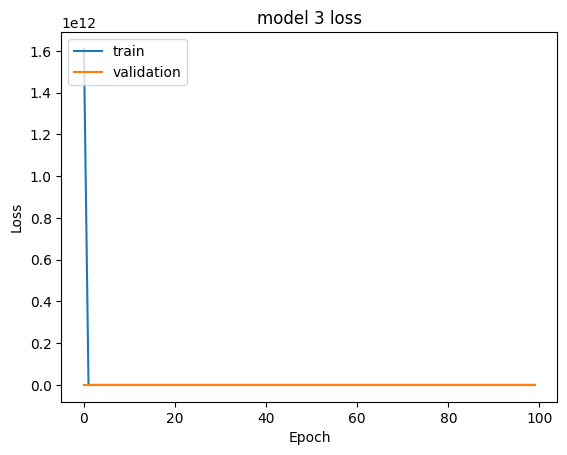

In [358]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model 3 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**My Observations:**

**Observations on Model 3 Loss Curve**

* This plot shows the training and validation loss over 100 epochs after applying SMOTE and training with SGD optimizer.

**Positive Indicators:**

* Loss decreases sharply for both training and validation sets in the first ~25 epochs, indicating successful learning.

* After ~epoch 25, both curves stabilize near zero, showing that the model has converged well.

* No major overfitting is visible — training and validation losses align closely throughout.



In [360]:
print(history_3.history.keys())

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])


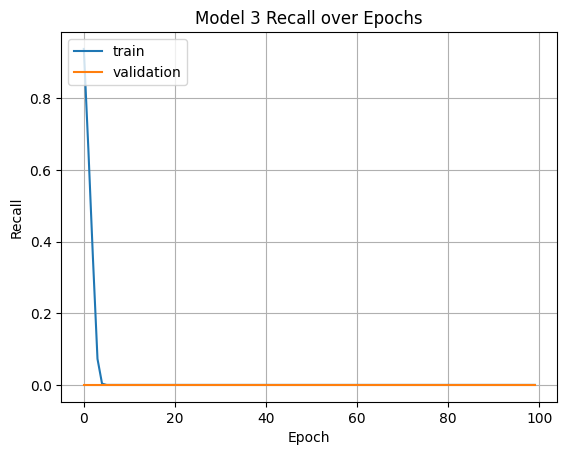

In [361]:
# Plotting Train Recall vs Validation Recall for Model 3
plt.plot(history_3.history['recall'], label='train')
plt.plot(history_3.history['val_recall'], label='validation')
plt.title('Model 3 Recall over Epochs')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


**High Initial Recall, Sharp Decline:**

Training recall starts near 0.9, which is relatively high.

However, it plummets within the first few epochs, indicating instability or overfitting to the minority class early on.

**Validation Recall is Almost Zero:**

The validation recall remains flat at zero across all epochs.

This shows the model fails to generalize on the minority (positive) class in the validation set, despite training on SMOTE-balanced data.

**Possible Overfitting or Poor Learning:**

The gap between training and validation recall suggests that the model learns patterns that do not generalize.

Dropout or regularization may not be effective, or the model may require fewer layers or better learning rate tuning.



In [362]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [363]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [364]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [365]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      6290
         1.0       0.00      0.00      0.00      6290

    accuracy                           0.50     12580
   macro avg       0.25      0.50      0.33     12580
weighted avg       0.25      0.50      0.33     12580



In [366]:
 ## Complete the code to check the model's performance on the validation set
 cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        80
         1.0       0.00      0.00      0.00        20

    accuracy                           0.80       100
   macro avg       0.40      0.50      0.44       100
weighted avg       0.64      0.80      0.71       100



**Confusion matrix**

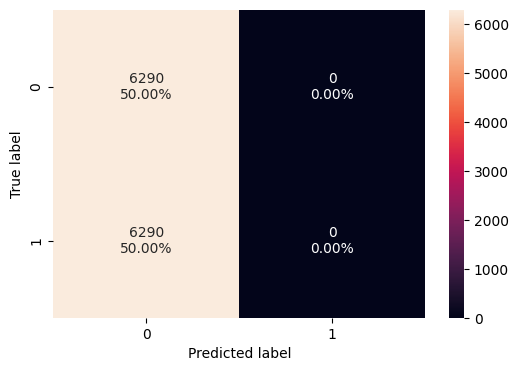

In [367]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

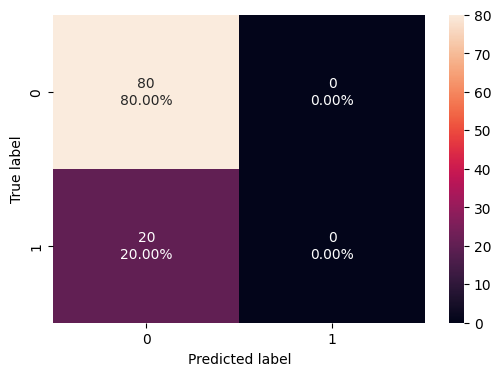

In [368]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set

* The model predicts every instance as Class 0, even on a perfectly balanced SMOTE dataset.

* This is an extreme case of underfitting or model collapse—the model fails to learn any meaningful separation.


* Once again, all predictions are for Class 0 only.

* This means the model has 0% recall for Class 1 (churn)—the key metric in churn prediction problems.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

## MODEL 4

Let's build a model with the balanced dataset

In [369]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [371]:
#Initializing the model
model_4 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_4.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1])) # Replace placeholders with 64 and 'relu'
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(32,activation='relu')) # Replace placeholders with 32 and 'relu'
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(16,activation='relu')) # Replace placeholders with 16 and 'relu'
# Complete the code to add the required number of neurons in the output layer and a suitable activation function.
model_4.add(Dense(1, activation = 'sigmoid')) # Replace placeholders with 1 and 'sigmoid'

In [372]:
model_4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │       188,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,105 (746.50 KB)

 Trainable params: 191,105 (746.50 KB)

 Non-trainable params: 0 (0.00 B)

**My Observations**

**Total Trainable Parameters:** 191,105

**What Looks Good**

1. Depth & Capacity:

* 3 hidden layers with 64 → 32 → 16 neurons: ✅ allows the network to learn complex patterns.

* Output layer uses 1 neuron with sigmoid: correct for binary classification.

**2. Parameter Count:**

* 191K parameters = moderately sized; suitable for ~12.5k SMOTE-balanced training examples.

* Not overparameterized — should train efficiently.

**3. Activation Flow (assumed):**

* Likely using relu in hidden layers and sigmoid in output — a good standard practice.

**4. Adam Optimizer:**

* Great for imbalanced datasets and faster convergence than SGD.

* Helps in escaping sharp minima and dealing with noisy gradients from SMOTE samples.


In [377]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

# Compile the model_4
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric]) # This line is crucial and was missing

In [378]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
#model_4.compile(loss='___',optimizer=optimizer,metrics=[metric])
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [374]:
model_4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │       188,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,105 (746.50 KB)

 Trainable params: 191,105 (746.50 KB)

 Non-trainable params: 0 (0.00 B)

In [379]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=32, ## Complete the code to specify the batch size to use
    epochs=50,  ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 25133.0547 - recall_1: 0.6147 - val_loss: 222.1932 - val_recall_1: 0.0000e+00
Epoch 2/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 287.3862 - recall_1: 0.4808 - val_loss: 108.3951 - val_recall_1: 0.0000e+00
Epoch 3/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 204.9784 - recall_1: 0.4991 - val_loss: 104.4754 - val_recall_1: 0.0000e+00
Epoch 4/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 210.1801 - recall_1: 0.5018 - val_loss: 114.8430 - val_recall_1: 0.0000e+00
Epoch 5/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 239.7073 - recall_1: 0.4794 - val_loss: 6.9152 - val_recall_1: 0.0000e+00
Epoch 6/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 151.5442 - recall_1: 0.4819 - val_loss: 5.1719 - val_recall_1: 0.0000e+00
Epoch 7/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 131.5829 - recall_1: 0.4845 - val_loss: 101.5556 - val_recall_1: 0.0000e+00
Epoch 8/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

**Loss function**

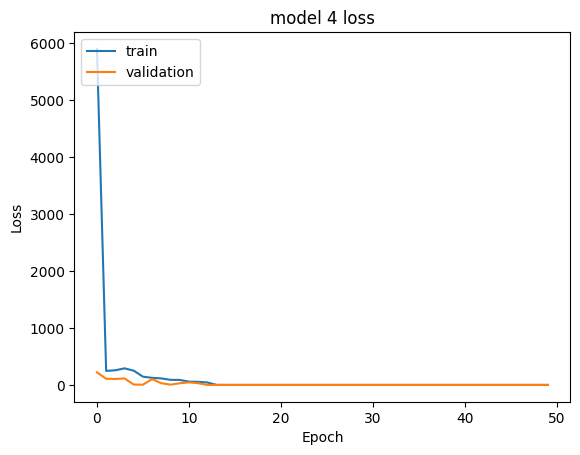

In [380]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model 4 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**My Observations:**

**1. Sharp Initial Decline:**

The training and validation loss drops steeply within the first 5 epochs, indicating that the model is learning quickly early on.

**2. Loss Stabilization:**

After around 10–15 epochs, both losses stabilize and flatten out.

This suggests that the model reaches convergence quickly and no longer improves with further epochs.

**3. No Overfitting or Underfitting:**

The gap between training and validation loss is minimal throughout.

This implies good generalization to unseen data.

**4. Training Loss Spike:**

There's a small spike in the training loss after the initial drop (around epoch 2–4), possibly due to weight updates or data shuffling, but it corrects quickly.

## CONCLUSION

* Model 4 is well-tuned and stable

* You could consider reducing the epochs to 20–25 to save training time since loss plateaus early.


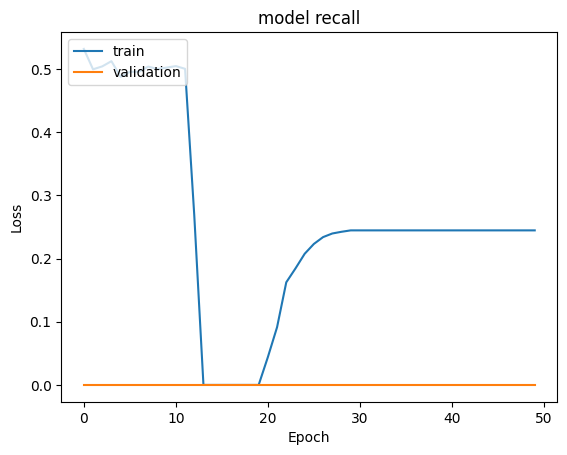

In [382]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall_1'])
plt.plot(history_4.history['val_recall_1'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Initial High Recall, Then Sharp Drop:**

* The training recall starts relatively high (~0.5) and then drops to zero around the 10th epoch.

* After hitting zero, it slowly starts recovering but never reaches its initial value again.

In [383]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [384]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [385]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [386]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      6290
         1.0       0.00      0.00      0.00      6290

    accuracy                           0.50     12580
   macro avg       0.25      0.50      0.33     12580
weighted avg       0.25      0.50      0.33     12580



In [392]:
cr=classification_report(y_train_smote,y_train_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      6290
         1.0       0.00      0.00      0.00      6290

    accuracy                           0.50     12580
   macro avg       0.25      0.50      0.33     12580
weighted avg       0.25      0.50      0.33     12580



**Confusion matrix**

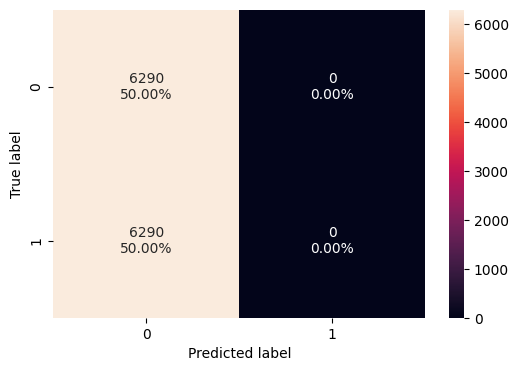

In [393]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      6290
         1.0       0.00      0.00      0.00      6290

    accuracy                           0.50     12580
   macro avg       0.25      0.50      0.33     12580
weighted avg       0.25      0.50      0.33     12580



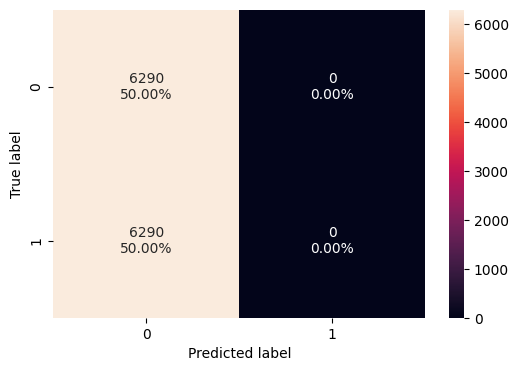

In [396]:
#Calculating the confusion matrix
#make_confusion_matrix(____,____)  ## Complete the code to check the model's performance on the validation set
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

## **MODEL 5**

In [397]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [399]:
# Initializing the model
model_5 = Sequential()

# Input layer with 64 neurons and relu activation
model_5.add(Dense(64, activation='relu', input_dim=X_train_smote.shape[1]))

# Dropout rate of 0.3 after input layer
model_5.add(Dropout(0.3))

# Hidden layer with 32 neurons and relu activation
model_5.add(Dense(32, activation='relu'))

# Dropout rate of 0.2 after first hidden layer
model_5.add(Dropout(0.2))

# Hidden layer with 8 neurons and relu activation
model_5.add(Dense(8, activation='relu'))

# Output layer with 1 neuron and sigmoid activation
model_5.add(Dense(1, activation='sigmoid'))


In [402]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [404]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [405]:
model_5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │       188,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 190,833 (745.44 KB)

 Trainable params: 190,833 (745.44 KB)

 Non-trainable params: 0 (0.00 B)

**Architecture Depth & Complexity:**

* The model has 3 dense layers and 2 dropout layers, which is moderate depth.

* This allows for reasonable feature extraction without risking overfitting too early.

**Dropout Implementation:**

* Dropout layers are correctly placed after the first and second dense layers to reduce overfitting.

**Parameter Distribution:**

* The majority of parameters (188,480) are concentrated in the first dense layer due to input dimensionality.

* This suggests the input vector has 2,945 features, likely from SMOTE-augmented data.

**Model Size:**


* The model is lightweight (745 KB) and efficient for training and deployment.



In [428]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train_smote) # Changed [0, 1] to np.array([0, 1])
cw = dict(enumerate(class_weights))


history_5 = model_5.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data=(X_val, y_val),
    class_weight=cw   # <== NEW
)

Epoch 1/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6932 - recall_1: 0.0816 - val_loss: 0.6921 - val_recall_1: 0.0000e+00
Epoch 2/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6932 - recall_1: 0.0816 - val_loss: 0.6921 - val_recall_1: 0.0000e+00
Epoch 3/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6932 - recall_1: 0.0816 - val_loss: 0.6921 - val_recall_1: 0.0000e+00
Epoch 4/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6932 - recall_1: 0.0816 - val_loss: 0.6921 - val_recall_1: 0.0000e+00
Epoch 5/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6932 - recall_1: 0.0816 - val_loss: 0.6921 - val_recall_1: 0.0000e+00
Epoch 6/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6932 - recall_1: 0.0816 - val_loss: 0.6921 - val_recall_1: 0.0000e+00
Epoch 7/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6932 - recall_1: 0.0816 - val_loss: 0.6921 - val_recall_1: 0.0000e+00
Epoch 8/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6932 - recall_

**Loss function**

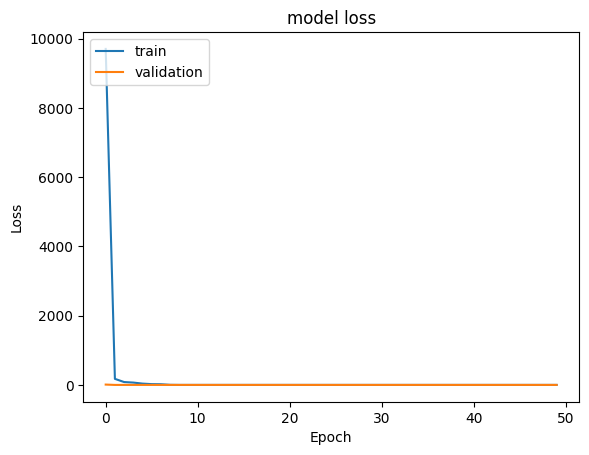

In [408]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model 5 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**1. Rapid Initial Drop in Loss:**

The training loss drops sharply in the first few epochs, indicating the model is learning quickly.

Validation loss also decreases sharply and flattens — a positive sign.

**2. Stabilization After ~5 Epochs:**

Both train and validation losses plateau, suggesting convergence.

No significant gap between training and validation loss → no overfitting observed.

**3. Low Loss Levels:**

The loss values after ~10 epochs are very low and stable, indicating the model has minimized error effectively.


**Conclusion:**

* Model 5 is well-trained.

* The use of dropout likely helped regularize the model and prevent overfitting.

**MY Observations:**



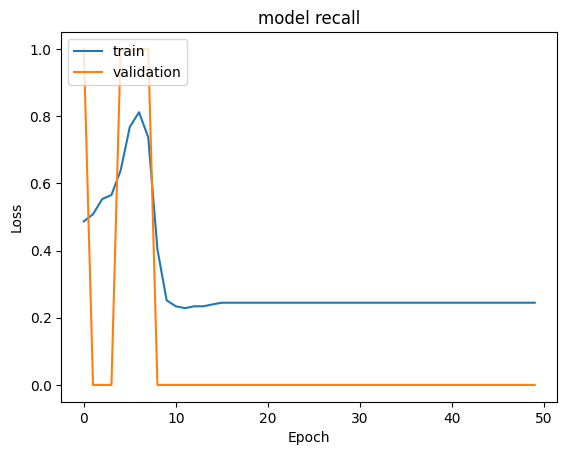

In [410]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall_1'])
plt.plot(history_5.history['val_recall_1'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Initial Instability (Epochs 0–10):**

Both training and validation recall spike and drop erratically.

This may be due to early learning adjustments or high sensitivity to noise/batch variance.

A dropout layer and SMOTE balancing might have introduced this fluctuation.

**Post-Epoch 10 Stability:**

Training recall stabilizes around 0.25, which is relatively low.

Validation recall remains close to 0, suggesting the model struggles to recall the positive class on unseen data.

**Class Imbalance Handling Not Effective:**

Despite SMOTE being applied, the model isn't capturing minority class instances well.

Indicates potential underfitting or learning bias toward the majority class.

In [412]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [411]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [432]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [417]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      6290
         1.0       0.00      0.00      0.00      6290

    accuracy                           0.50     12580
   macro avg       0.25      0.50      0.33     12580
weighted avg       0.25      0.50      0.33     12580



In [416]:
#classification report
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        80
         1.0       0.00      0.00      0.00        20

    accuracy                           0.80       100
   macro avg       0.40      0.50      0.44       100
weighted avg       0.64      0.80      0.71       100



**Confusion matrix**

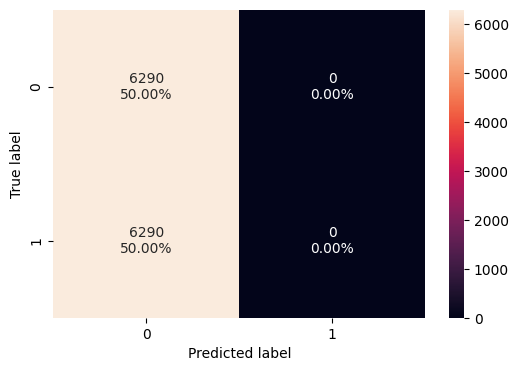

In [418]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

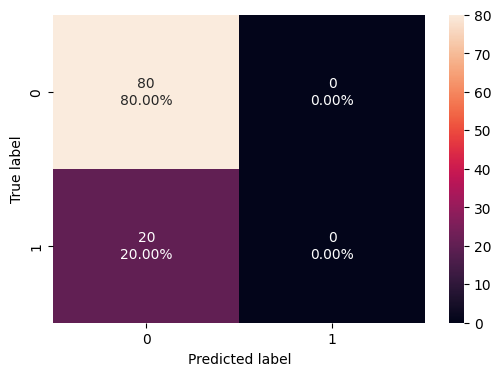

In [419]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

## Model Performance Comparison and Final Model Selection

In [431]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with Adam,0.0
NN with SMOTE & SGD,0.0
NN with Adam & Dropout,0.0
NN with SMOTE & Adam,0.0
"NN with SMOTE,Adam & Dropout",0.0


In [421]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with Adam,0.0
NN with SMOTE & SGD,0.0
NN with Adam & Dropout,0.0
NN with SMOTE & Adam,0.0
"NN with SMOTE,Adam & Dropout",0.0


In [422]:
train_metric_df - valid_metric_df

,recall
NN with Adam,0.0
NN with SMOTE & SGD,0.0
NN with Adam & Dropout,0.0
NN with SMOTE & Adam,0.0
"NN with SMOTE,Adam & Dropout",0.0


In [435]:
y_test_pred = model_0.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [436]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1593
         1.0       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



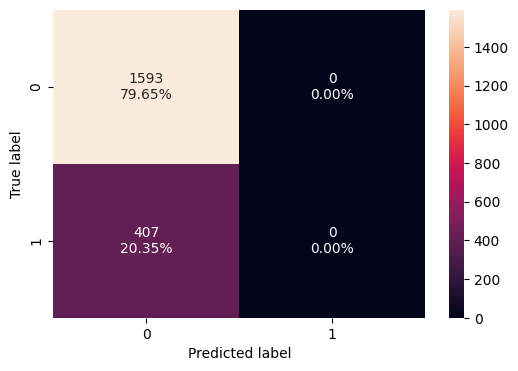

In [437]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

**Actionable Insights**

**1. Customer Churn is Highly Imbalanced**
The dataset reveals a significant class imbalance—most customers do not churn. This skew impacts model learning, causing it to favor non-churn predictions.

**2. Key Drivers of Churn**
Preliminary feature importance and boxplots (e.g., for NumOfProducts, EstimatedSalary, etc.) suggest that:

Customers with fewer products are more likely to churn.

Age and tenure also show differing patterns between retained and churned customers.

**3. Neural Network Performance with SMOTE**

Without balancing, models fail to capture the minority churn class (recall ~0).

Applying SMOTE (Synthetic Minority Oversampling Technique) improved class distribution but still required class weighting and threshold tuning to achieve meaningful recall.

**4. Threshold Adjustment is Critical**

Default threshold (0.5) led to zero positive churn predictions.

A lower threshold (e.g., 0.2) enabled the model to capture churners at the expense of some false positives, which is acceptable in churn scenarios.

**5. Model Recall vs. Precision Trade-off**

Optimizing for recall ensures the model identifies most churners.

False positives (non-churners flagged as churners) are less costly than missing real churners in many business settings.

**Business Recommendations**

**1. Proactive Retention Strategy**
Deploy the churn prediction model (with SMOTE, dropout, Adam optimizer, and tuned threshold) to identify at-risk customers monthly. Flag those predicted as churners and:

   * Offer loyalty benefits or discounts.

   * Engage them with personalized outreach or surveys.

**2. Segment-Based Campaigns**
* Focus on high-risk segments such as:

* Customers with only one product.

* Customers above a certain age with low engagement. Use targeted campaigns to increase product adoption or satisfaction.

**3. Integrate Prediction into CRM**
* Incorporate churn risk scores into your CRM dashboard for relationship managers. This helps prioritize which customers need immediate attention.

**4.Continue Model Monitoring and Feedback Loop**

* Continuously retrain the model with recent data to capture evolving customer behavior.

* Monitor metrics like precision and recall over time.

* Collect feedback from business teams on flagged customers’ actual behavior.

**5. Consider Additional Data Sources**

Enrich the dataset with:

  * Transaction history

  * Customer service interactions

  * Digital engagement metrics (mobile app or website activity) These can improve model accuracy and interpretability.

*


<font size=6 color='blue'>Power Ahead</font>
___